<a href="https://colab.research.google.com/github/Samenergy/Clustering-Practice/blob/main/Clustering_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [22]:
# Load dataset
file_path = "/content/water_potability.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

In [23]:
# Check for missing values
print("Missing Values Before Handling:\n", df.isnull().sum())


Missing Values Before Handling:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [24]:
# Drop or fill NaN values
df = df.dropna()  # Option 1: Remove rows with NaNs
# df.fillna(df.mean(), inplace=True)  # Option 2: Fill NaNs with column mean


In [25]:
# Drop the target column 'Potability'
df = df.drop(columns=['Potability'])


In [26]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [27]:
# Elbow Method to determine optimal number of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

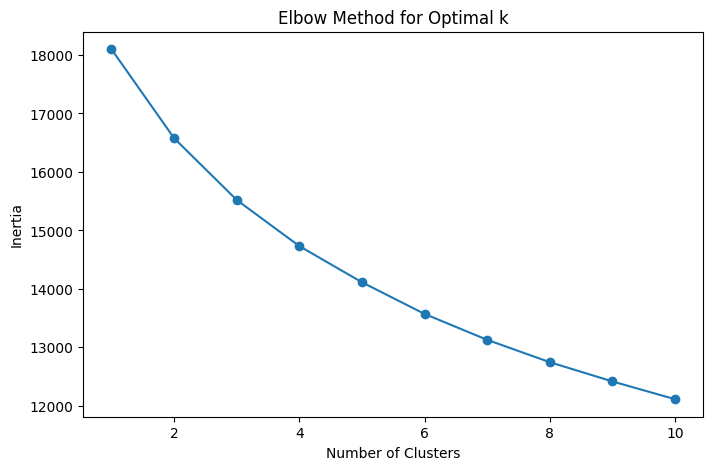

In [28]:
# Plot the elbow method result
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [29]:
# Choose optimal number of clusters based on the elbow plot
optimal_k = 3  # Adjust based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)


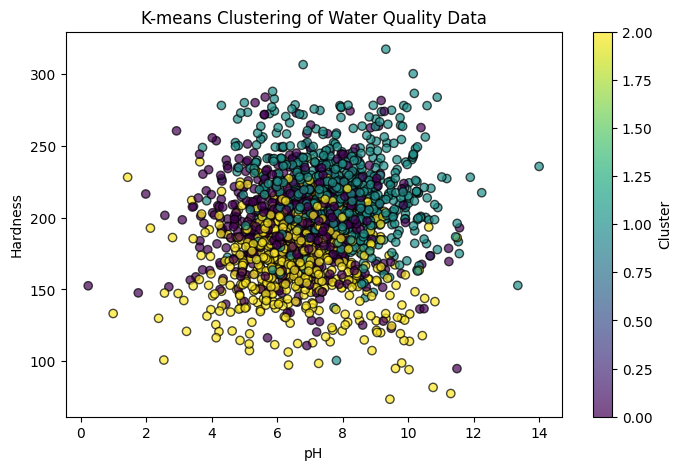

In [30]:
# Visualizing clusters using the first two features (pH and Hardness)
plt.figure(figsize=(8, 5))
plt.scatter(df['ph'], df['Hardness'], c=df['Cluster'], cmap='viridis', edgecolors='k', alpha=0.7)
plt.xlabel('pH')
plt.ylabel('Hardness')
plt.title('K-means Clustering of Water Quality Data')
plt.colorbar(label='Cluster')
plt.show()